# College Basketball NCAA Tournament Prediction Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

cbb_data = pd.read_csv("https://raw.githubusercontent.com/kevinmorris1/myrepository/master/Full%20CBB%20DATA.csv")
cbb_data.head()

Team Conference  Games Played  Wins  Adjusted Offensive Efficiency  \
0  Michigan        B10            24    20                          118.1   
1    Baylor        B12            24    22                          123.2   
2  Illinois        B10            29    23                          117.7   
3   Gonzaga        WCC            26    26                          125.4   
4      Iowa        B10            29    21                          123.5   

   Adjusted Defensive Efficiency  Power Rating  \
0                           91.1        0.9521   
1                           94.5        0.9548   
2                           90.4        0.9539   
3                           89.8        0.9791   
4                           95.7        0.9491   

   Effective Field Goal Percentage Shot  \
0                                  54.9   
1                                  57.5   
2                                  55.6   
3                                  61.0   
4                                  54.6   

   Effective Field Goal Percentage Allowed  Turnover Rate  ...  \
0                                     44.9           16.3  ...   
1                                     49.1           17.6  ...   
2                                     46.6           18.2  ...   
3                                     47.5           16.1  ...   
4                                     48.3           13.3  ...   

   Offensive Rebound Rate  Offensive Rebound Rate Allowed  \
0                    29.4                            24.8   
1                    37.5                            30.9   
2                    33.0                            22.2   
3                    30.4                            23.4   
4                    30.7                            28.6   

   Two-Point Shooting Percentage  Two-Point Shooting Percentage Allowed  \
0                           53.3                                   42.3   
1                           54.1                                   48.1   
2                           55.3                                   45.4   
3                           64.0                                   46.8   
4                           52.4                                   45.8   

   Three-Point Shooting Percentage  Three-Point Shooting Percentage Allowed  \
0                             38.7                                     33.5   
1                             41.8                                     34.0   
2                             37.6                                     32.7   
3                             36.5                                     32.5   
4                             38.6                                     34.8   

   Adjusted Tempo  Wins Above Bubble  Seed  Year  
0            66.9                7.2   1.0  2021  
1            68.8                6.6   1.0  2021  
2            70.7                8.9   1.0  2021  
3            74.6                8.5   1.0  2021  
4            70.0                5.6   2.0  2021  

[5 rows x 21 columns]

Each year in the data has a seed value for each team, indicating their seeding number for the bracket. If the seeding column does not contain a value, then that team did not qualify for the tournament that year. 

In [2]:
# Data cleaning and EDA
# First step is to fill in the na values with the seeding column with 0. Those are teams that did not make the tournament 
cbb_data['Seed'] = cbb_data['Seed'].fillna(0)

# Create a new column variable IsTournament - will be to show which teams made the tournament and which teams did not 
cbb_data['IsTournament'] = np.where(cbb_data['Seed']==0, 0, 1)
cbb_data['WinPerc'] = cbb_data['Wins'] / cbb_data['Games Played']
cbb_data.head()

Team Conference  Games Played  Wins  Adjusted Offensive Efficiency  \
0  Michigan        B10            24    20                          118.1   
1    Baylor        B12            24    22                          123.2   
2  Illinois        B10            29    23                          117.7   
3   Gonzaga        WCC            26    26                          125.4   
4      Iowa        B10            29    21                          123.5   

   Adjusted Defensive Efficiency  Power Rating  \
0                           91.1        0.9521   
1                           94.5        0.9548   
2                           90.4        0.9539   
3                           89.8        0.9791   
4                           95.7        0.9491   

   Effective Field Goal Percentage Shot  \
0                                  54.9   
1                                  57.5   
2                                  55.6   
3                                  61.0   
4                                  54.6   

   Effective Field Goal Percentage Allowed  Turnover Rate  ...  \
0                                     44.9           16.3  ...   
1                                     49.1           17.6  ...   
2                                     46.6           18.2  ...   
3                                     47.5           16.1  ...   
4                                     48.3           13.3  ...   

   Two-Point Shooting Percentage  Two-Point Shooting Percentage Allowed  \
0                           53.3                                   42.3   
1                           54.1                                   48.1   
2                           55.3                                   45.4   
3                           64.0                                   46.8   
4                           52.4                                   45.8   

   Three-Point Shooting Percentage  Three-Point Shooting Percentage Allowed  \
0                             38.7                                     33.5   
1                             41.8                                     34.0   
2                             37.6                                     32.7   
3                             36.5                                     32.5   
4                             38.6                                     34.8   

   Adjusted Tempo  Wins Above Bubble  Seed  Year  IsTournament   WinPerc  
0            66.9                7.2   1.0  2021             1  0.833333  
1            68.8                6.6   1.0  2021             1  0.916667  
2            70.7                8.9   1.0  2021             1  0.793103  
3            74.6                8.5   1.0  2021             1  1.000000  
4            70.0                5.6   2.0  2021             1  0.724138  

[5 rows x 23 columns]

Knowing that a null value in the seeding column indicates a team did not make the NCAA tournament that year, a new variable called IsTournament that is a boolean value with 0 meaning did not make the tournament and 1 the team did make the tournament. 

In [3]:
# Check for duplicate data - duplicated data can significantly change the results of a model/analysis 
duplicate_data = cbb_data.duplicated()
print('Number of Duplicate Rows: %d: ' % (duplicate_data.sum()))

Number of Duplicate Rows: 0: 


In [4]:
# Check for missing data - Missing data can significantly change the results of a model/analysis 

missing_data = cbb_data.isnull().sum().sum()
print('Number of Missing Data points: %d: ' % (missing_data))

Number of Missing Data points: 0: 


Good to see after all the csv files were combined there are no duplicate rows or missing data points. Now time to start the exploratory data analysis. 

# Exploratory Analysis

In [5]:
# A general description of the numeric columns in the dataset provides some information on the behavior of the dataset
# For example, the mean number of wins is 15.76, so any value above that for a team could be considered above the average wins-losses record

cbb_data.describe()

Games Played         Wins  Adjusted Offensive Efficiency  \
count   2802.000000  2802.000000                    2802.000000   
mean      30.344397    15.761242                     103.133262   
std        4.187188     6.607723                       7.375919   
min        5.000000     0.000000                      76.600000   
25%       29.000000    11.000000                      98.100000   
50%       31.000000    15.000000                     102.700000   
75%       33.000000    20.000000                     107.900000   
max       40.000000    38.000000                     129.100000   

       Adjusted Defensive Efficiency  Power Rating  \
count                    2802.000000   2802.000000   
mean                      103.135724      0.493855   
std                         6.564828      0.256536   
min                        84.000000      0.005000   
25%                        98.325000      0.281950   
50%                       103.200000      0.475800   
75%                       107.600000      0.713525   
max                       124.000000      0.984200   

       Effective Field Goal Percentage Shot  \
count                           2802.000000   
mean                              49.828551   
std                                3.139189   
min                               39.200000   
25%                               47.800000   
50%                               49.800000   
75%                               51.900000   
max                               61.000000   

       Effective Field Goal Percentage Allowed  Turnover Rate   Steal Rate  \
count                              2802.000000    2802.000000  2802.000000   
mean                                 50.028979      18.789044    18.715739   
std                                   2.932683       2.112900     2.209615   
min                                  39.600000      11.900000    10.200000   
25%                                  48.000000      17.300000    17.200000   
50%                                  50.000000      18.700000    18.600000   
75%                                  52.000000      20.100000    20.100000   
max                                  60.100000      27.100000    28.500000   

       Offensive Rebound Rate  ...  Two-Point Shooting Percentage  \
count             2802.000000  ...                    2802.000000   
mean                29.602355  ...                      48.913704   
std                  4.220813  ...                       3.409452   
min                 15.000000  ...                      37.700000   
25%                 26.800000  ...                      46.600000   
50%                 29.600000  ...                      48.800000   
75%                 32.400000  ...                      51.100000   
max                 43.600000  ...                      64.000000   

       Two-Point Shooting Percentage Allowed  Three-Point Shooting Percentage  \
count                            2802.000000                      2802.000000   
mean                               49.094004                        34.314418   
std                                 3.365820                         2.792591   
min                                37.700000                        24.900000   
25%                                46.800000                        32.400000   
50%                                49.100000                        34.300000   
75%                                51.400000                        36.200000   
max                                61.200000                        44.100000   

       Three-Point Shooting Percentage Allowed  Adjusted Tempo  \
count                              2802.000000     2802.000000   
mean                                 34.504532       67.888615   
std                                   2.437874        3.216661   
min                                  26.100000       57.200000   
25%                                  32.900000       65.800000   
50%                                  34.5

In [6]:
# Show the number of teams that made the tournament each year for each conference 
teams_by_year_cols = cbb_data[['Year', 'Conference', 'Team', 'IsTournament']]
teams_by_year_cols = teams_by_year_cols[teams_by_year_cols['IsTournament']==1]
teams_by_year = teams_by_year_cols.groupby(['Year', 'Conference']).count().rename(columns={'Team':'Total'})
teams_by_year = teams_by_year.reset_index()
teams_by_year.sort_values('Total', ascending=False)

Year Conference  Total  IsTournament
128  2017        ACC      9             9
160  2018        ACC      9             9
227  2021        B10      9             9
195  2019        B10      8             8
185  2018        SEC      8             8
6    2013         BE      8             8
37   2014        B12      7             7
100  2016        B10      7             7
132  2017        B10      7             7
117  2016        P12      7             7
192  2019        ACC      7             7
216  2019        SEC      7             7
101  2016        B12      7             7
165  2018        B12      7             7
223  2021        ACC      7             7
228  2021        B12      7             7
96   2016        ACC      7             7
68   2015        B10      7             7
69   2015        B12      7             7
4    2013        B10      7             7
134  2017         BE      7             7
196  2019        B12      6             6
31   2014        A10      6             6
32   2014        ACC      6             6
166  2018         BE      6             6
133  2017        B12      6             6
53   2014        P12      6             6
36   2014        B10      6             6
64   2015        ACC      6             6
70   2015         BE      6             6
247  2021        SEC      6             6
153  2017        SEC      5             5
89   2015        SEC      5             5
102  2016         BE      5             5
0    2013        A10      5             5
243  2021        P12      5             5
5    2013        B12      5             5
18   2013        MWC      5             5
21   2013        P12      5             5
35   2014       Amer      4             4
149  2017        P12      4             4
85   2015        P12      4             4
229  2021         BE      4             4
99   2016       Amer      4             4
197  2019         BE      4             4
1    2013        ACC      4             4
38   2014         BE      4             4
194  2019       Amer      4             4
164  2018        B10      4             4
25   2013        SEC      3             3
121  2016        SEC      3             3
181  2018        P12      3             3
95   2016        A10      3             3
63   2015        A10      3             3
163  2018       Amer      3             3
57   2014        SEC      3             3
212  2019        P12      3             3
82   2015        MWC      3             3
127  2017        A10      3             3
159  2018        A10      3             3
81   2015        MVC      2             2
94   2015        WCC      2             2
199  2019       BSth      2             2
240  2021        MWC      2             2
239  2021        MVC      2             2
131  2017       Amer      2             2
178  2018        MWC      2             2
209  2019        MWC      2             2
226  2021       Amer      2             2
211  2019        OVC      2             2
222  2021        A10      2             2
221  2019        WCC      2             2
158  2017        WCC      2             2
113  2016        MVC      2             2
191  2019        A10      2             2
252  2021        WCC      2             2
17   2013        MVC      2             2
30   2013        WCC      2             2
67   2015       Amer      2             2
50   2014        MWC      2             2
62   2014        WCC      2             2
23   2013         SB      2             2
76   2015       Horz      1             1
24   2013         SC      1             1
190  2018        WCC      1             1
29   2013        WAC      1             1
28   2013        Sum      1             1
193  2019         AE      1             1
27   2013       Slnd      1             1
26   2013       SWAC      1             1
198  2019       BSky      1             1
22   2013        Pat      1             1
200  2019         BW      1             1
201  2019        CAA      1             1
202  2019      

An interesting consideration is the success of teams based on conference affiliation. As seen in the data, certain conferences tend to send a lot of teams to the tournament, so conference could be a very valuable predictor for tournanamen qualification.

<AxesSubplot:xlabel='Conference', ylabel='Total'>

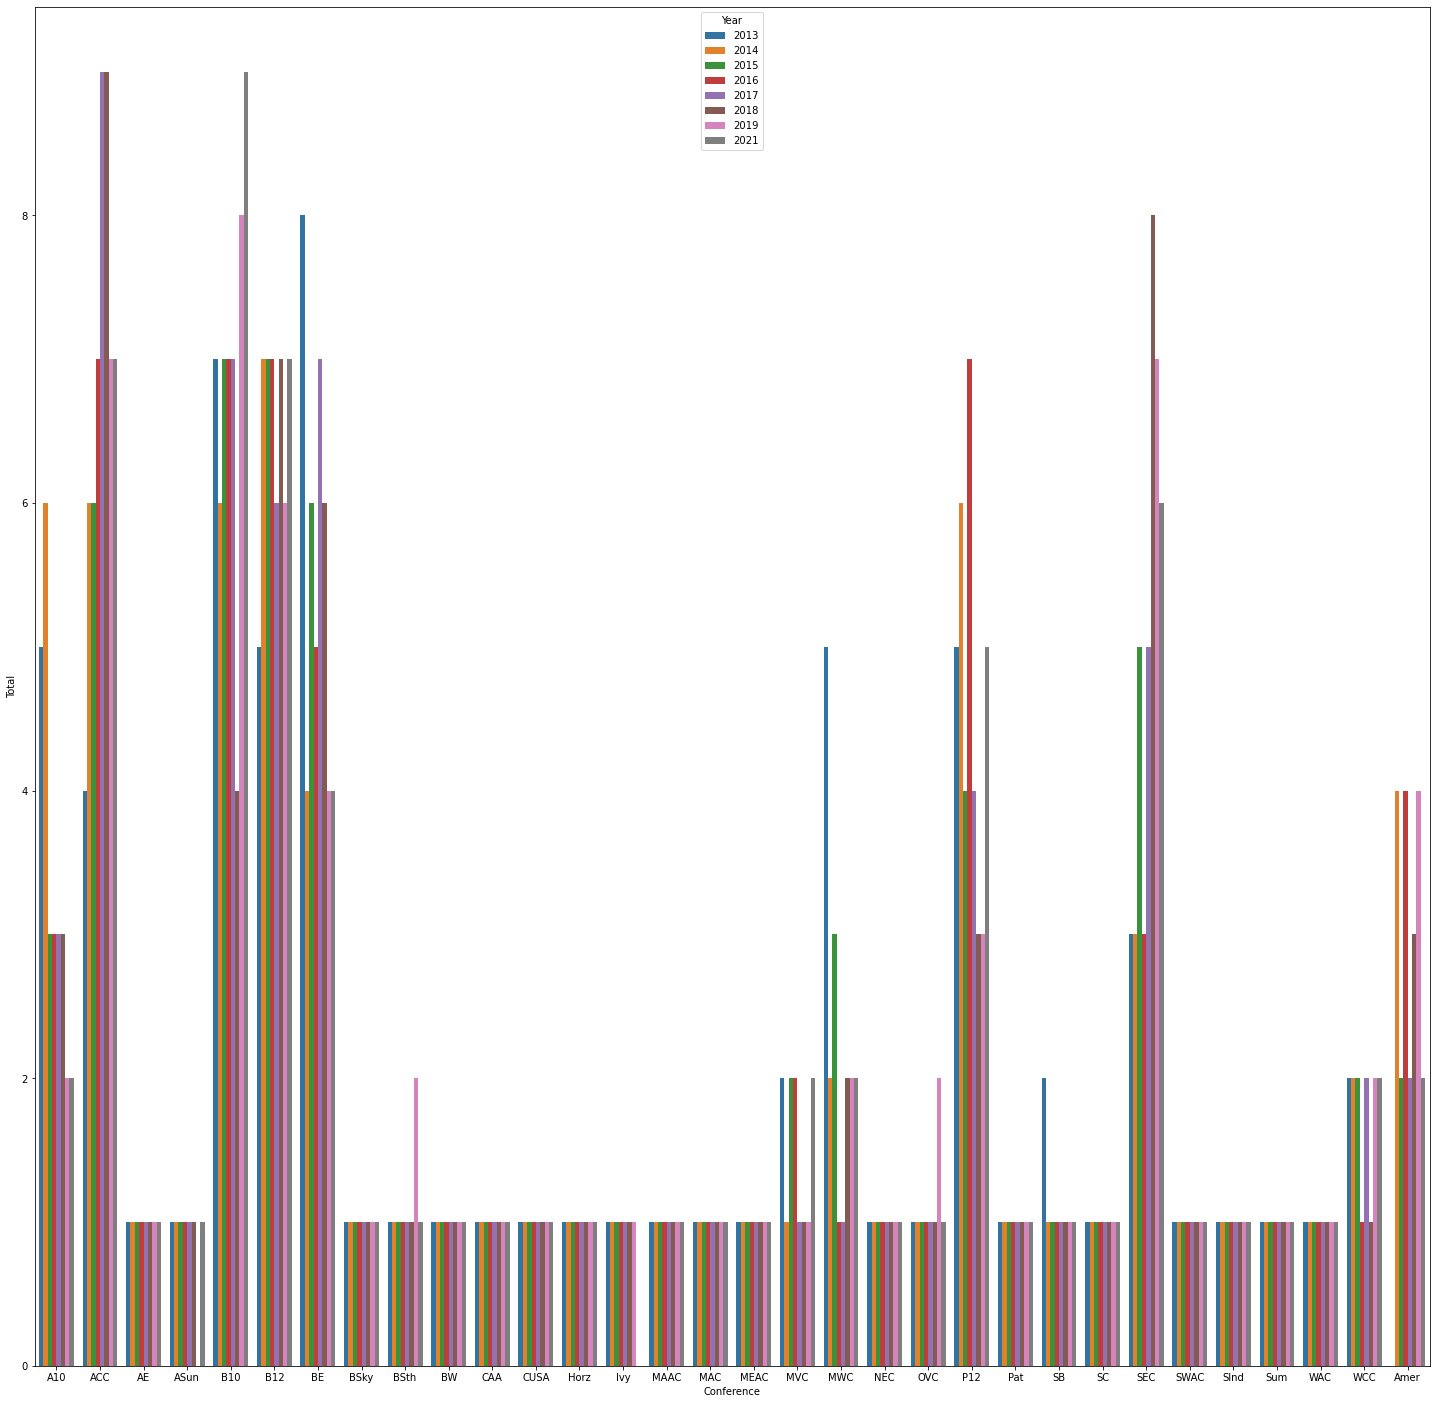

In [7]:
# Visualize Above 
plt.figure(figsize=(25, 25))

sns.barplot(x='Conference', y='Total', hue='Year', data=teams_by_year, ci=None)

<AxesSubplot:xlabel='Year'>

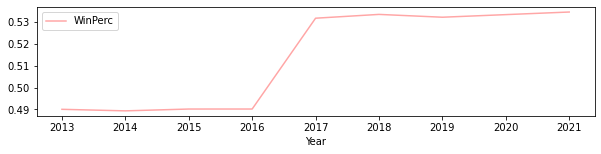

In [8]:
cbb_data.pivot_table(index='Year',values = 'WinPerc').plot.line(figsize=[10,2],color='red',alpha=0.35)

Interesting how from 2016 to 2017 there was a big jump. That might be worth looking into, there may be some underlying factors here. Another factor in this study could be how stats have increased like mean number of games, more three point shots taken, more or less foul/ free throws,etc.

As expected the Power 5 conferenes (BIG10, BIG12,PAC12, SEC, ACC) lead the way with sending many teams to the tournament every year, it looks like some mid major conferences have spikes every few years like the WCC, MWC, and American conference. 

Further EDA can be done to see which metrics are common in each team that makes the tournament and at which seed, next will look at the relationships of what decides a tournament appearance and what seed. 

In [9]:
# Correlation Matrix of all the variables 
corr_matrix = cbb_data.corr()
corr_matrix

Games Played      Wins  \
Games Played                                 1.000000  0.610864   
Wins                                         0.610864  1.000000   
Adjusted Offensive Efficiency                0.431766  0.739218   
Adjusted Defensive Efficiency               -0.335794 -0.654954   
Power Rating                                 0.442765  0.796374   
Effective Field Goal Percentage Shot         0.200637  0.585730   
Effective Field Goal Percentage Allowed     -0.303769 -0.581633   
Turnover Rate                               -0.218029 -0.440079   
Steal Rate                                   0.020406  0.133253   
Offensive Rebound Rate                       0.294051  0.321852   
Offensive Rebound Rate Allowed               0.036320 -0.306287   
Two-Point Shooting Percentage                0.147117  0.544573   
Two-Point Shooting Percentage Allowed       -0.330589 -0.529298   
Three-Point Shooting Percentage              0.205154  0.428290   
Three-Point Shooting Percentage Allowed     -0.130241 -0.426787   
Adjusted Tempo                              -0.072197 -0.022884   
Wins Above Bubble                            0.329817  0.854499   
Seed                                         0.209553  0.429882   
Year                                        -0.464267 -0.076320   
IsTournament                                 0.325795  0.601724   
WinPerc                                      0.316252  0.934831   

                                         Adjusted Offensive Efficiency  \
Games Played                                                  0.431766   
Wins                                                          0.739218   
Adjusted Offensive Efficiency                                 1.000000   
Adjusted Defensive Efficiency                                -0.489713   
Power Rating                                                  0.862431   
Effective Field Goal Percentage Shot                          0.723210   
Effective Field Goal Percentage Allowed                      -0.298375   
Turnover Rate                                                -0.607400   
Steal Rate                                                   -0.130856   
Offensive Rebound Rate                                        0.256630   
Offensive Rebound Rate Allowed                               -0.258102   
Two-Point Shooting Percentage                                 0.639010   
Two-Point Shooting Percentage Allowed                        -0.297538   
Three-Point Shooting Percentage                               0.570398   
Three-Point Shooting Percentage Allowed                      -0.176551   
Adjusted Tempo                                                0.058584   
Wins Above Bubble                                             0.822441   
Seed                                                          0.322930   
Year                                                          0.017698   
IsTournament                                                  0.544441   
WinPerc                                                       0.699284   

                                         Adjusted Defensive Efficiency  \
Games Played                                                 -0.335794   
Wins                                                         -0.654954   
Adjusted Offensive Efficiency                                -0.489713   
Adjusted Defensive Efficiency                                 1.000000   
Power Rating                                                 -0.838339   
Effective Field Goal Percentage Shot                         -0.195821   
Effective Field Goal Percentage Allowed                       0.781330   
Turnover Rate                                                 0.172657   
Steal Rate                                                   -0.259378   
Offensive Rebound Rate                                       -0.290964   
Offensive Rebound Rate Allowed                                0.334748   
Two-Point Shooting Percentage                    

<AxesSubplot:>

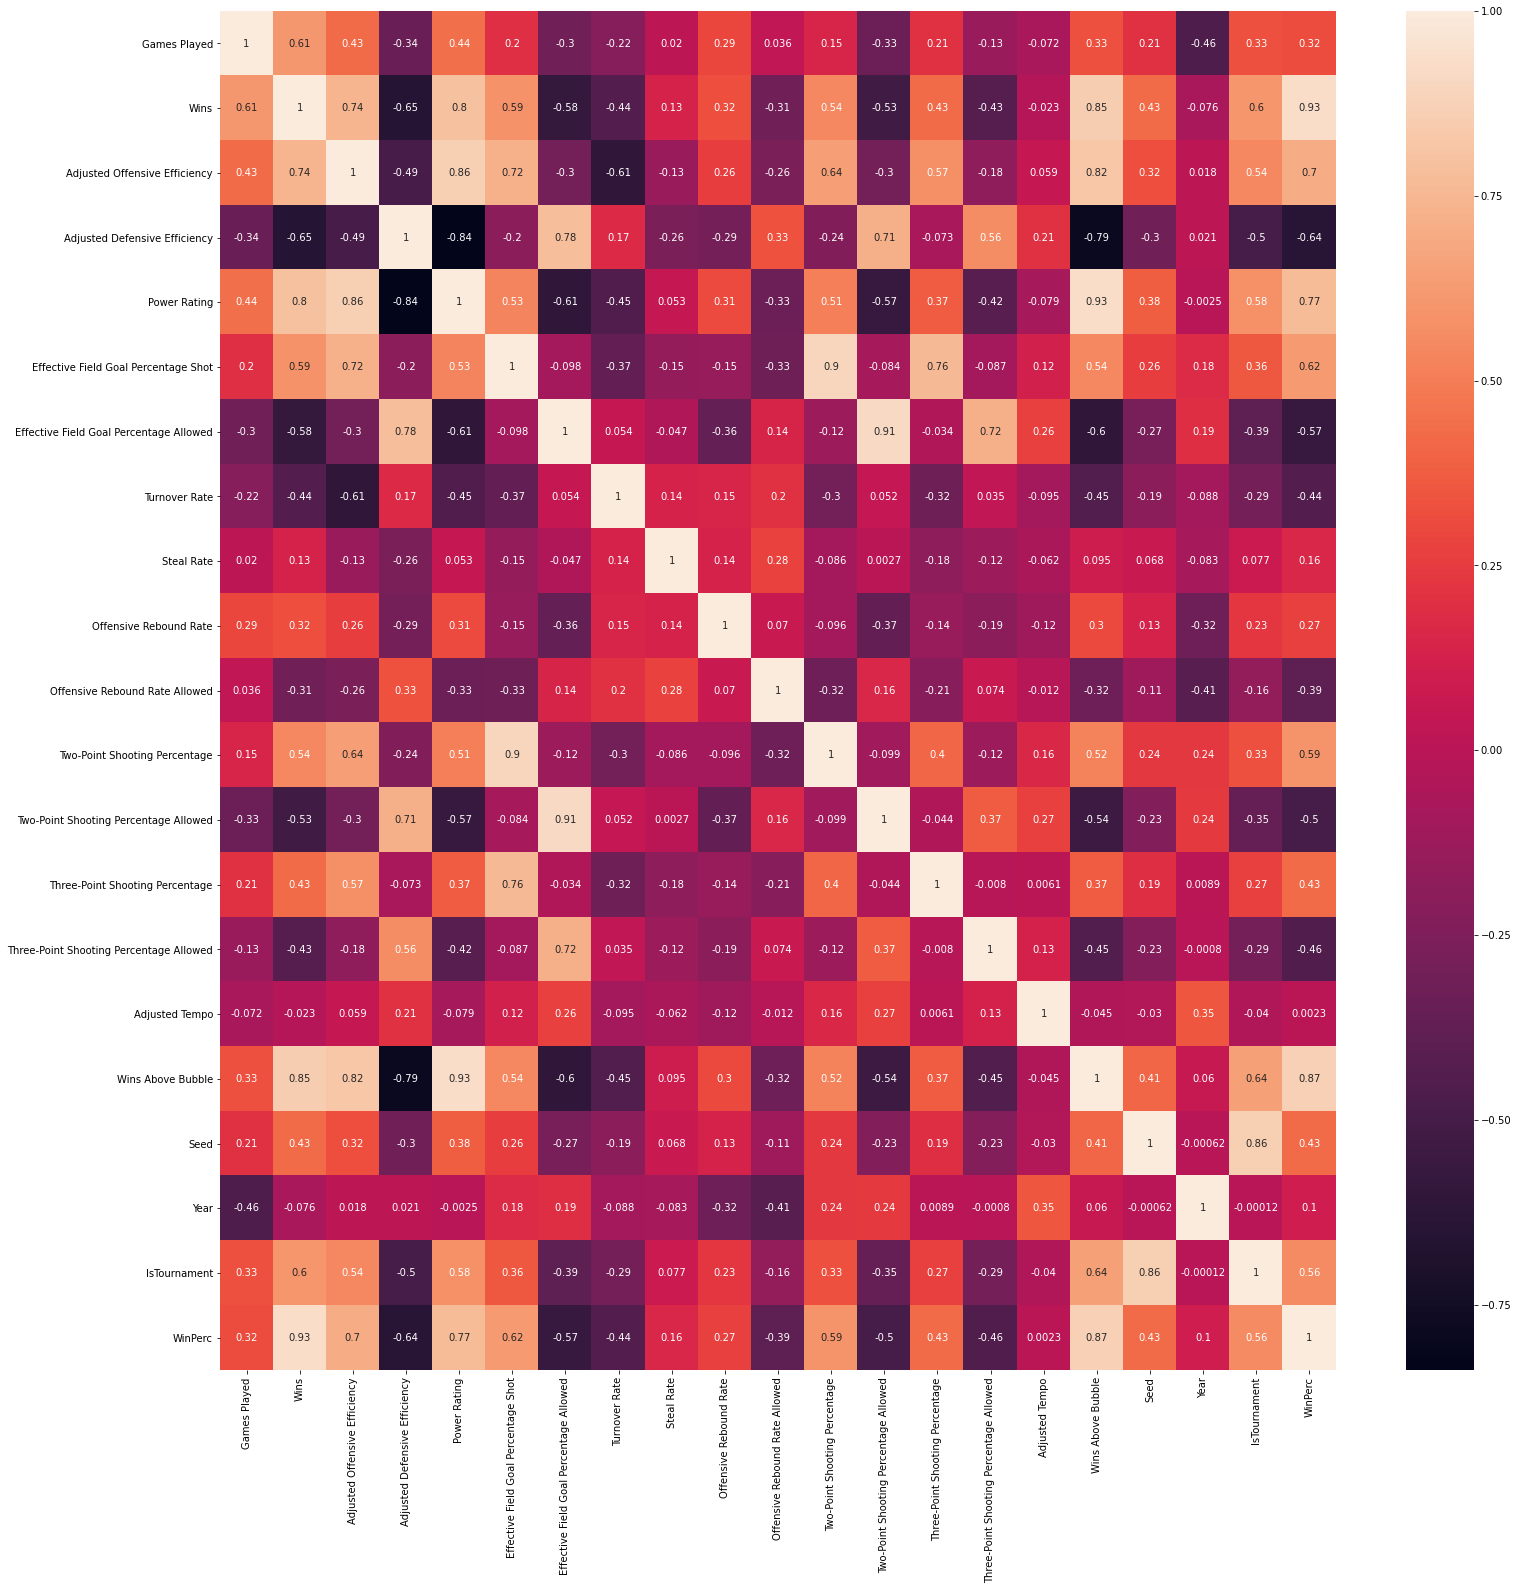

In [10]:
# Create a heatmap to visualize the correlations
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True) 

As expected wins had the highest correlation for teams that make the tournament. Interesting, but expected Adjusted Offensive Efficiency had the second strongest correlation in terms of a tournament team which makes sense the more offensive or better offensive teams that score more which lead to more wins (has a strong correlation to AOE) more likely to make the tournament. At the same time ADE (Adjusted Defensive Efficiency) has a negative correlation to making the tournament and wins. If you play bad defensive its hard to win and if you don't win you don't make the tournament.

The other stronger correlations to making the tournament were PowerRanking and Wins Above The Bubble. This also makes sense as the more wins beating an average D1 team which is the level of play and more wins against teams that won't make the tournament increase the chances of playing in march madness

In terms of relationship to the seeding, nothing really standouts out. The strongest correlation is Wins Above The Bubble.

In [11]:
cbb_data = cbb_data.drop(['Team'],axis=1)

In [12]:
# Create boolean variables for conference affiliation to be used in analysis

cbb_data = pd.get_dummies(cbb_data)
cbb_data

Games Played  Wins  Adjusted Offensive Efficiency  \
0               24    20                          118.1   
1               24    22                          123.2   
2               29    23                          117.7   
3               26    26                          125.4   
4               29    21                          123.5   
5               30    21                          122.1   
6               26    24                          120.6   
7               30    24                          111.0   
8               27    18                          115.9   
9               26    19                          113.8   
10              27    20                          108.5   
11              28    22                          110.4   
12              22    16                          117.8   
13              24    18                          114.6   
14              27    18                          112.4   
15              28    20                          109.3   
16              22    16                          117.9   
17              26    18                          108.8   
18              28    20                          114.4   
19              30    22                          113.7   
20              27    17                          112.3   
21              25    20                          112.8   
22              29    22                          112.0   
23              26    23                          111.1   
24              23    14                          110.6   
25              22    15                          114.6   
26              23    16                          105.9   
27              26    20                          113.1   
28              25    15                          111.0   
29              28    18                          108.8   
30              27    18                          119.3   
31              26    24                          108.5   
32              20    16                          111.1   
33              25    16                          111.3   
34              29    17                          111.3   
35              25    17                          113.0   
36              26    15                          106.7   
37              21    15                          109.3   
38              28    16                          110.0   
39              26    19                          104.6   
40              27    15                          105.8   
41              19    16                          109.6   
42              25    16                          112.8   
43              26    17                          112.3   
44              27    20                          105.2   
45              27    25                          111.8   
46              25    13                          108.5   
47              28    17                          108.5   
48              24    22                          107.9   
49              24    23                          104.2   
50              22    16                          111.9   
51              25    17                          104.4   
52              29    21                          102.3   
53              24    23                          109.1   
54              15    14                          110.8   
55              22    16                          107.7   
56              23    23                          101.8   
57              28    23                           99.3   
58              17    12                          101.1   
59              23    16                          107.0   
60              20    17                          102.7   
61              26    19                           99.9   
62              19    12                          107.9   
63              22    12                           95.7   
64              23    15                           97.3   
65              21    16                           99.4   
66              23    16                           97

In [13]:
# Here we set the training data to be years before 2019, and the testing set is for 2019 and 2021 teams.
# Recall that the year 2020 is not included in the data since the tournament was cancelled that year.

test_data = cbb_data[cbb_data['Year'] >= 2019].reset_index()
train_data = cbb_data[cbb_data['Year'] < 2019].reset_index()

data2021 = test_data[test_data['Year'] == 2021]

In [14]:
# Remove select the IsTournament column as the response variable.
# save the seeding information for 2021 for later seeding analysis

seed = data2021['Seed']

X_train = train_data.drop(['Seed','IsTournament'], axis=1)
y_train = train_data['IsTournament']
X_test = test_data.drop(['Seed','IsTournament'], axis=1)
y_test = test_data['IsTournament']

# Model Building - Decision Tree

In [15]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=None)
decision_tree = decision_tree.fit(X_train, y_train)

In [16]:
# Decision tree predictions being generated

tree_predY = decision_tree.predict(X_test)

In [17]:
pd.concat([X_test, y_test, pd.Series(tree_predY, name = 'TournamentPred')], axis=1).drop(['index'], axis=1)

Games Played  Wins  Adjusted Offensive Efficiency  \
0              24    20                          118.1   
1              24    22                          123.2   
2              29    23                          117.7   
3              26    26                          125.4   
4              29    21                          123.5   
5              30    21                          122.1   
6              26    24                          120.6   
7              30    24                          111.0   
8              27    18                          115.9   
9              26    19                          113.8   
10             27    20                          108.5   
11             28    22                          110.4   
12             22    16                          117.8   
13             24    18                          114.6   
14             27    18                          112.4   
15             28    20                          109.3   
16             22    16                          117.9   
17             26    18                          108.8   
18             28    20                          114.4   
19             30    22                          113.7   
20             27    17                          112.3   
21             25    20                          112.8   
22             29    22                          112.0   
23             26    23                          111.1   
24             23    14                          110.6   
25             22    15                          114.6   
26             23    16                          105.9   
27             26    20                          113.1   
28             25    15                          111.0   
29             28    18                          108.8   
30             27    18                          119.3   
31             26    24                          108.5   
32             20    16                          111.1   
33             25    16                          111.3   
34             29    17                          111.3   
35             25    17                          113.0   
36             26    15                          106.7   
37             21    15                          109.3   
38             28    16                          110.0   
39             26    19                          104.6   
40             27    15                          105.8   
41             19    16                          109.6   
42             25    16                          112.8   
43             26    17                          112.3   
44             27    20                          105.2   
45             27    25                          111.8   
46             25    13                          108.5   
47             28    17                          108.5   
48             24    22                          107.9   
49             24    23                          104.2   
50             22    16                          111.9   
51             25    17                          104.4   
52             29    21                          102.3   
53             24    23                          109.1   
54             15    14                          110.8   
55             22    16                          107.7   
56             23    23                          101.8   
57             28    23                           99.3   
58             17    12                          101.1   
59             23    16                          107.0   
60             20    17                          102.7   
61             26    19                           99.9   
62             19    12                          107.9   
63             22    12                           95.7   
64             23    15                           97.3   
65             21    16                           99.4   
66             23    16                           97.3   
67             24    17                           99.0   
68 

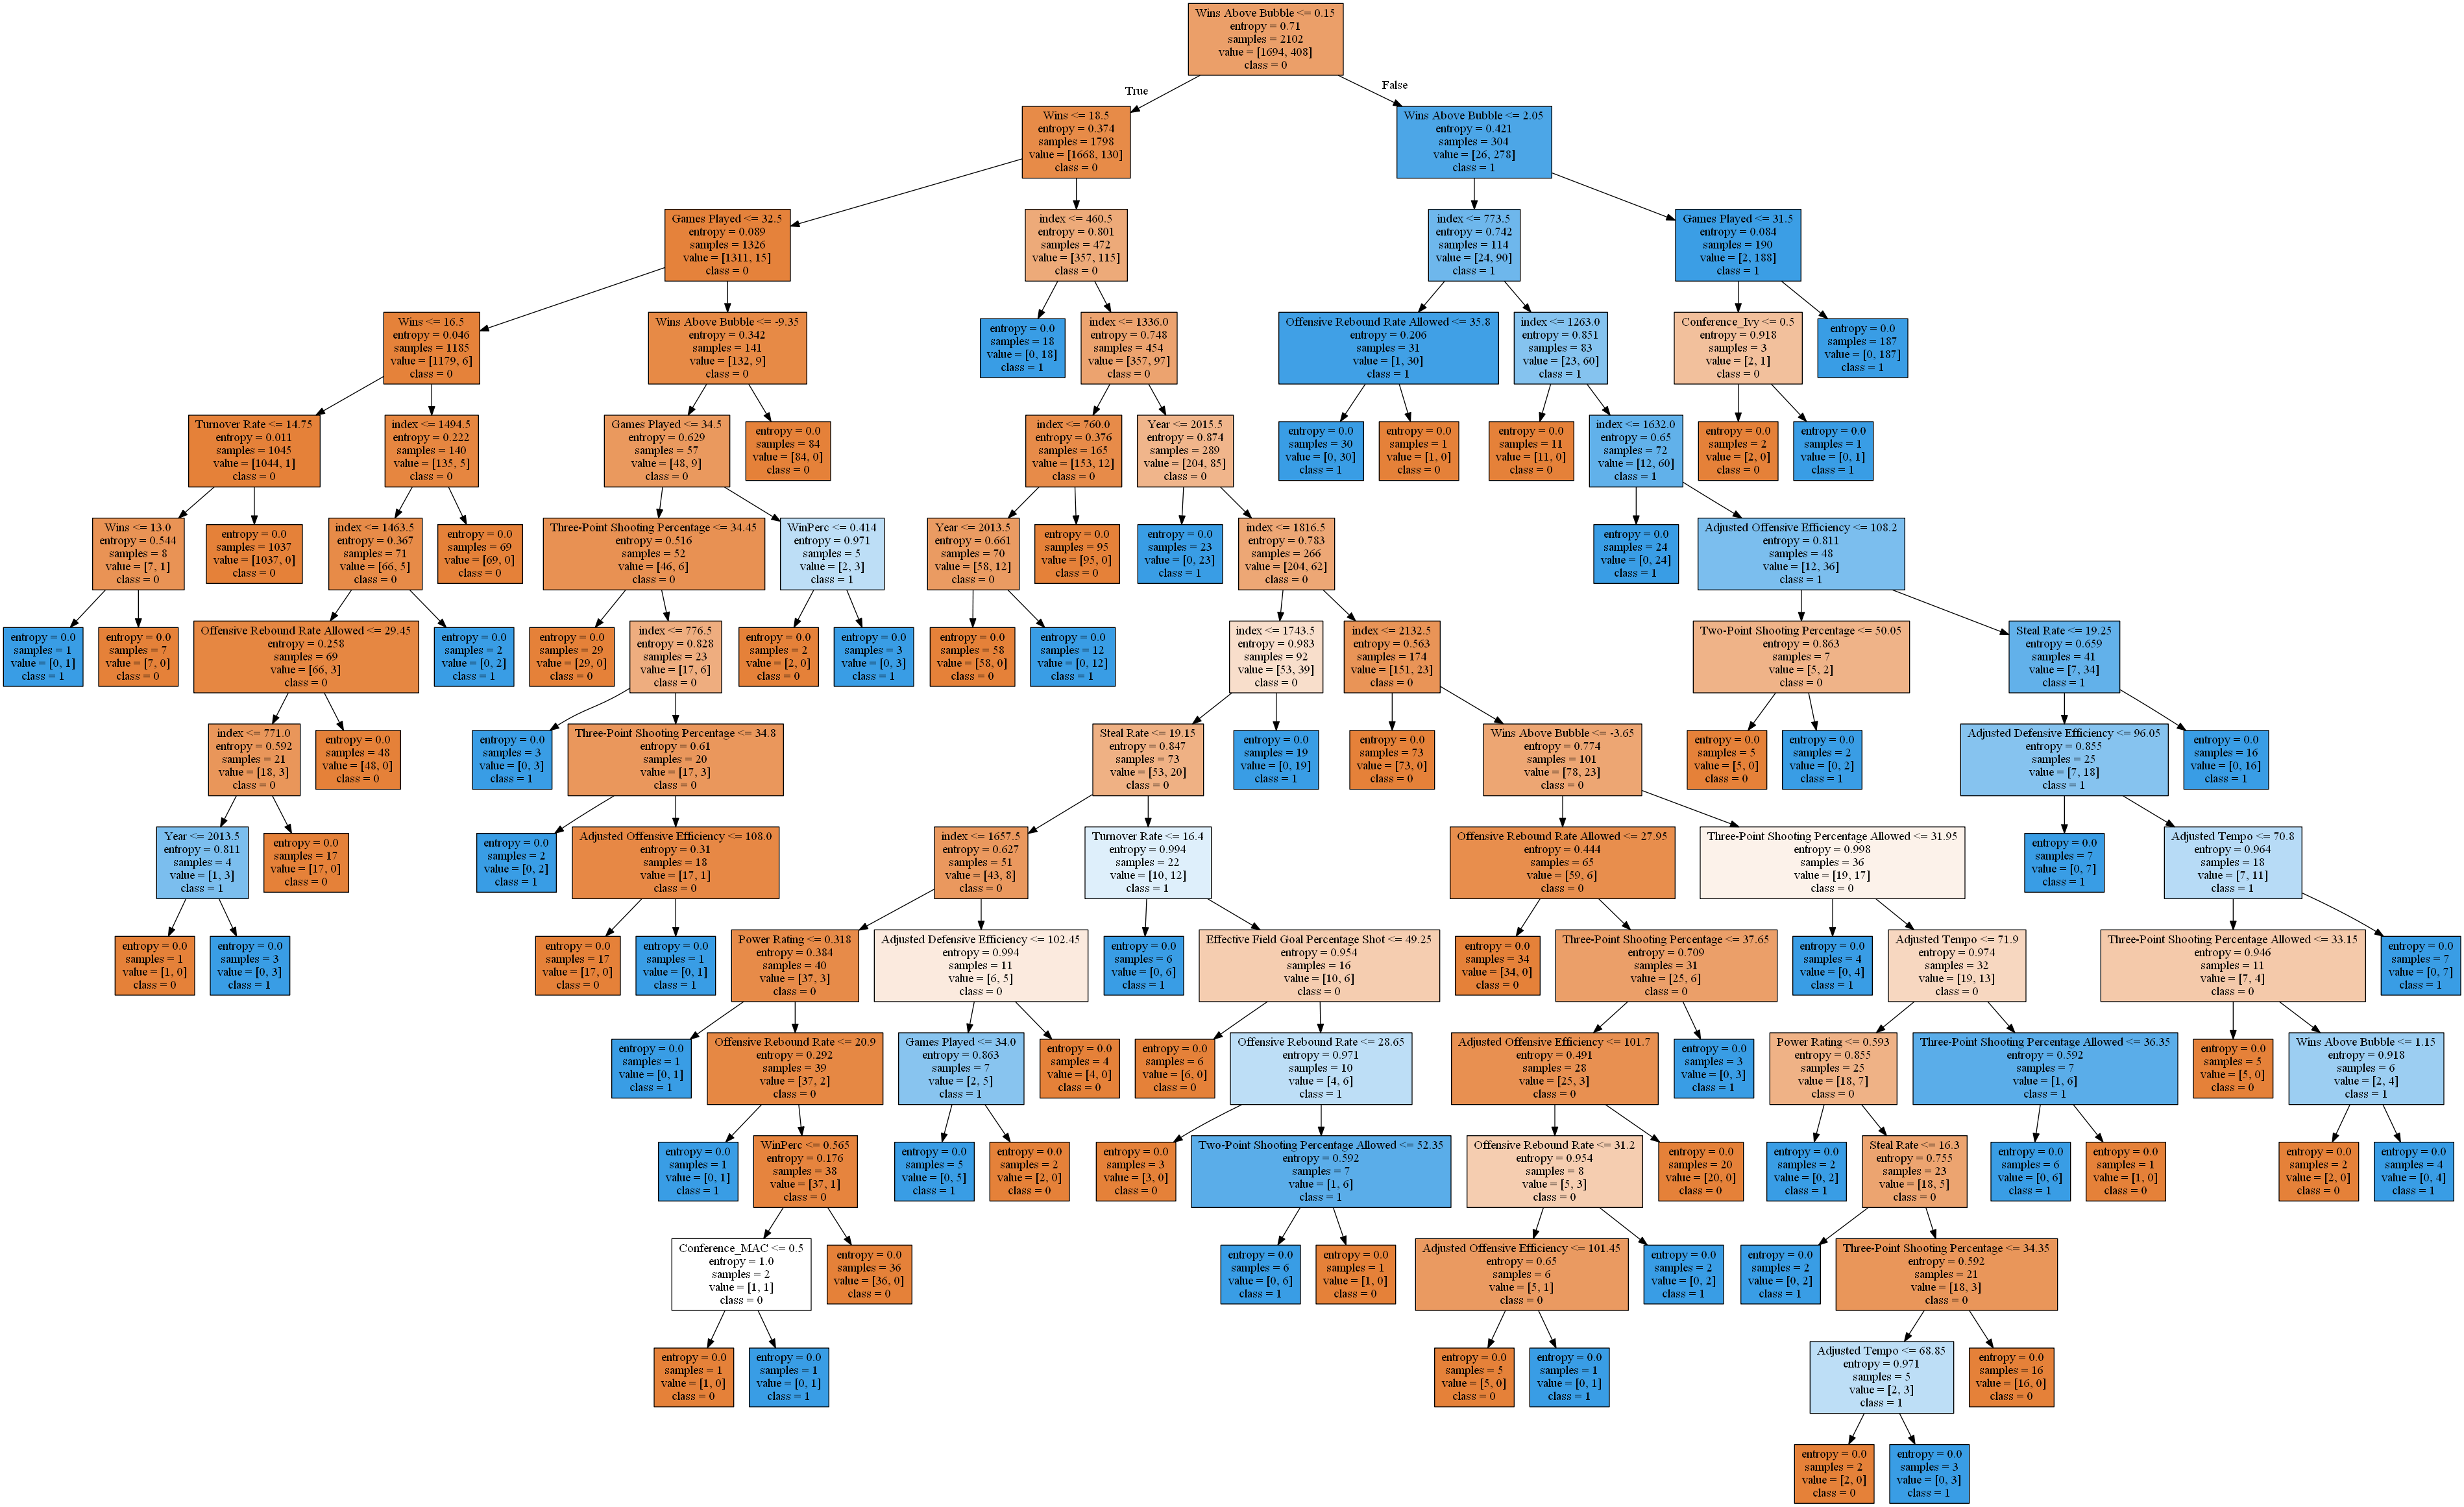

In [18]:
# Visulaization of Decision Tree
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(decision_tree, feature_names=X_train.columns, class_names=['0','1'],filled=True,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [19]:
# Display the number of predictions for tournament appearances

pd.Series(tree_predY).value_counts()

0    574
1    126
dtype: int64

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [21]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, tree_predY)))
print('Precision on test data is %.2f' % (precision_score(y_test, tree_predY)))
print('Recall on test data is %.2f' % (recall_score(y_test, tree_predY)))
print('F1-Score on test data is %.2f' % (f1_score(y_test, tree_predY)))

Accuracy on test data is 0.86
Precision on test data is 0.64
Recall on test data is 0.60
F1-Score on test data is 0.62


# Model Building - Logistic regression

In [22]:
# build logistic regression model from training data.

import sklearn.linear_model
model = sklearn.linear_model.LogisticRegression(fit_intercept=True, max_iter=300)
model.fit(np.array(X_train),
          np.array(y_train))

C:\Users\kdmor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [23]:
logistic_predY = model.predict(X_test)
tournamentPreds = pd.Series(logistic_predY,name='TournamentPred')
predictions = pd.concat([X_test, y_test, tournamentPreds], axis=1).drop(['index'], axis=1)
predictions

Games Played  Wins  Adjusted Offensive Efficiency  \
0              24    20                          118.1   
1              24    22                          123.2   
2              29    23                          117.7   
3              26    26                          125.4   
4              29    21                          123.5   
5              30    21                          122.1   
6              26    24                          120.6   
7              30    24                          111.0   
8              27    18                          115.9   
9              26    19                          113.8   
10             27    20                          108.5   
11             28    22                          110.4   
12             22    16                          117.8   
13             24    18                          114.6   
14             27    18                          112.4   
15             28    20                          109.3   
16             22    16                          117.9   
17             26    18                          108.8   
18             28    20                          114.4   
19             30    22                          113.7   
20             27    17                          112.3   
21             25    20                          112.8   
22             29    22                          112.0   
23             26    23                          111.1   
24             23    14                          110.6   
25             22    15                          114.6   
26             23    16                          105.9   
27             26    20                          113.1   
28             25    15                          111.0   
29             28    18                          108.8   
30             27    18                          119.3   
31             26    24                          108.5   
32             20    16                          111.1   
33             25    16                          111.3   
34             29    17                          111.3   
35             25    17                          113.0   
36             26    15                          106.7   
37             21    15                          109.3   
38             28    16                          110.0   
39             26    19                          104.6   
40             27    15                          105.8   
41             19    16                          109.6   
42             25    16                          112.8   
43             26    17                          112.3   
44             27    20                          105.2   
45             27    25                          111.8   
46             25    13                          108.5   
47             28    17                          108.5   
48             24    22                          107.9   
49             24    23                          104.2   
50             22    16                          111.9   
51             25    17                          104.4   
52             29    21                          102.3   
53             24    23                          109.1   
54             15    14                          110.8   
55             22    16                          107.7   
56             23    23                          101.8   
57             28    23                           99.3   
58             17    12                          101.1   
59             23    16                          107.0   
60             20    17                          102.7   
61             26    19                           99.9   
62             19    12                          107.9   
63             22    12                           95.7   
64             23    15                           97.3   
65             21    16                           99.4   
66             23    16                           97.3   
67             24    17                           99.0   
68 

In [24]:
# value counts for tournament appearance predictions

pd.Series(logistic_predY).value_counts()

0    620
1     80
dtype: int64

In [25]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, logistic_predY)))
print('Precision on test data is %.2f' % (precision_score(y_test, logistic_predY)))
print('Recall on test data is %.2f' % (recall_score(y_test, logistic_predY)))
print('F1-Score on test data is %.2f' % (f1_score(y_test, logistic_predY)))

Accuracy on test data is 0.89
Precision on test data is 0.86
Recall on test data is 0.51
F1-Score on test data is 0.64


# Seeding Prediction Using Logistic Regression Model

In [26]:
# Display the probabilities associated with a team being predicted as in or out of the tournament

predictionPct = pd.DataFrame(model.predict_proba(X_test), columns=['ProbOut', 'ProbIn'])
predictionPct

ProbOut    ProbIn
0    0.382997  0.617003
1    0.222211  0.777789
2    0.048230  0.951770
3    0.146347  0.853653
4    0.295625  0.704375
5    0.239637  0.760363
6    0.711636  0.288364
7    0.071301  0.928699
8    0.530383  0.469617
9    0.456163  0.543837
10   0.352872  0.647128
11   0.253855  0.746145
12   0.884593  0.115407
13   0.768635  0.231365
14   0.500324  0.499676
15   0.189911  0.810089
16   0.848339  0.151661
17   0.762681  0.237319
18   0.390892  0.609108
19   0.422113  0.577887
20   0.833238  0.166762
21   0.620236  0.379764
22   0.353892  0.646108
23   0.583635  0.416365
24   0.882223  0.117777
25   0.925659  0.074341
26   0.773713  0.226287
27   0.433493  0.566507
28   0.902240  0.097760
29   0.564329  0.435671
30   0.677113  0.322887
31   0.652147  0.347853
32   0.928212  0.071788
33   0.820096  0.179904
34   0.706766  0.293234
35   0.771363  0.228637
36   0.759353  0.240647
37   0.930564  0.069436
38   0.860205  0.139795
39   0.697860  0.302140
40   0.729718  0.270282
41   0.938648  0.061352
42   0.879401  0.120599
43   0.772927  0.227073
44   0.871874  0.128126
45   0.391148  0.608852
46   0.924632  0.075368
47   0.830040  0.169960
48   0.809699  0.190301
49   0.431136  0.568864
50   0.947516  0.052484
51   0.942346  0.057654
52   0.851720  0.148280
53   0.821459  0.178541
54   0.952791  0.047209
55   0.971717  0.028283
56   0.753392  0.246608
57   0.580915  0.419085
58   0.988004  0.011996
59   0.962552  0.037448
60   0.979959  0.020041
61   0.766765  0.233235
62   0.991075  0.008925
63   0.992343  0.007657
64   0.962977  0.037023
65   0.966355  0.033645
66   0.960196  0.039804
67   0.985362  0.014638
68   0.997184  0.002816
69   0.999658  0.000342
70   0.999927  0.000073
71   0.998948  0.001052
72   0.999646  0.000354
73   0.999914  0.000086
74   0.999062  0.000938
75   0.999014  0.000986
76   0.999490  0.000510
77   0.999537  0.000463
78   0.999643  0.000357
79   0.999891  0.000109
80   0.997415  0.002585
81   0.999342  0.000658
82   0.999740  0.000260
83   0.999709  0.000291
84   0.999538  0.000462
85   0.999525  0.000475
86   0.998263  0.001737
87   0.999908  0.000092
88   0.999873  0.000127
89   0.999590  0.000410
90   0.998766  0.001234
91   0.997391  0.002609
92   0.999446  0.000554
93   0.998608  0.001392
94   0.999454  0.000546
95   0.997588  0.002412
96   0.998101  0.001899
97   0.999525  0.000475
98   0.999123  0.000877
99   0.999222  0.000778
100  0.999604  0.000396
101  0.999741  0.000259
102  0.999842  0.000158
103  0.999067  0.000933
104  0.999823  0.000177
105  0.998905  0.001095
106  0.999501  0.000499
107  0.998354  0.001646
108  0.999643  0.000357
109  0.998484  0.001516
110  0.998321  0.001679
111  0.999251  0.000749
112  0.998772  0.001228
113  0.998952  0.001048
114  0.999429  0.000571
115  0.996239  0.003761
116  0.996137  0.003863
117  0.998362  0.001638
118  0.997526  0.002474
119  0.997910  0.002090
120  0.999450  0.000550
121  0.999264  0.000736
122  0.999648  0.000352
123  0.998869  0.001131
124  0.998119  0.001881
125  0.999208  0.000792
126  0.998626  0.001374
127  0.997438  0.002562
128  0.998713  0.001287
129  0.997253  0.002747
130  0.998038  0.001962
131  0.998701  0.001299
132  0.999645  0.000355
133  0.999261  0.000739
134  0.999242  0.000758
135  0.999478  0.000522
136  0.998947  0.001053
137  0.999737  0.000263
138  0.994226  0.005774
139  0.997667  0.002333
140  0.996294  0.003706
141  0.994967  0.005033
142  0.998475  0.001525
143  0.996634  0.003366
144  0.998015  0.001985
145  0.994283  0.005717
146  0.998158  0.001842
147  0.998424  0.001576
148  0.998353  0.001647
149  0.997402  0.002598
150  0.997549  0.002451
151  0.999567  0.000433
152  0.999131  0.000869
153  0.998365  0.001635
154  0.994752  0.005248
155  0.996013  0.003987
156  0.996333  0.003667
157  0.996902  0.003098
158  0.995073  0.004927
159  0.995982  0.004018
160  0.998004  0.001996
161  0.996828  0.003172
162  0.998793  0.001207
163  0.998964  0.001036
164  0.994726  0.005274
165  0.999568  0.00043

In [27]:
# Add prediction percentages to the prediction dataframe

predictions = pd.concat([predictions, predictionPct], axis=1)
predictions

Games Played  Wins  Adjusted Offensive Efficiency  \
0              24    20                          118.1   
1              24    22                          123.2   
2              29    23                          117.7   
3              26    26                          125.4   
4              29    21                          123.5   
5              30    21                          122.1   
6              26    24                          120.6   
7              30    24                          111.0   
8              27    18                          115.9   
9              26    19                          113.8   
10             27    20                          108.5   
11             28    22                          110.4   
12             22    16                          117.8   
13             24    18                          114.6   
14             27    18                          112.4   
15             28    20                          109.3   
16             22    16                          117.9   
17             26    18                          108.8   
18             28    20                          114.4   
19             30    22                          113.7   
20             27    17                          112.3   
21             25    20                          112.8   
22             29    22                          112.0   
23             26    23                          111.1   
24             23    14                          110.6   
25             22    15                          114.6   
26             23    16                          105.9   
27             26    20                          113.1   
28             25    15                          111.0   
29             28    18                          108.8   
30             27    18                          119.3   
31             26    24                          108.5   
32             20    16                          111.1   
33             25    16                          111.3   
34             29    17                          111.3   
35             25    17                          113.0   
36             26    15                          106.7   
37             21    15                          109.3   
38             28    16                          110.0   
39             26    19                          104.6   
40             27    15                          105.8   
41             19    16                          109.6   
42             25    16                          112.8   
43             26    17                          112.3   
44             27    20                          105.2   
45             27    25                          111.8   
46             25    13                          108.5   
47             28    17                          108.5   
48             24    22                          107.9   
49             24    23                          104.2   
50             22    16                          111.9   
51             25    17                          104.4   
52             29    21                          102.3   
53             24    23                          109.1   
54             15    14                          110.8   
55             22    16                          107.7   
56             23    23                          101.8   
57             28    23                           99.3   
58             17    12                          101.1   
59             23    16                          107.0   
60             20    17                          102.7   
61             26    19                           99.9   
62             19    12                          107.9   
63             22    12                           95.7   
64             23    15                           97.3   
65             21    16                           99.4   
66             23    16                           97.3   
67             24    17                           99.0   
68 

In [28]:
# sort the predictions based on probability of qualifying for the tournament

predictions = predictions.sort_values('ProbIn', ascending=False)

# filter down to the 2021 season

predictions2021 = predictions[predictions['Year'] == 2021].sort_values('ProbIn', ascending=False)
predictions2021

Games Played  Wins  Adjusted Offensive Efficiency  \
2              29    23                          117.7   
7              30    24                          111.0   
3              26    26                          125.4   
15             28    20                          109.3   
1              24    22                          123.2   
5              30    21                          122.1   
11             28    22                          110.4   
4              29    21                          123.5   
10             27    20                          108.5   
22             29    22                          112.0   
0              24    20                          118.1   
18             28    20                          114.4   
45             27    25                          111.8   
19             30    22                          113.7   
49             24    23                          104.2   
27             26    20                          113.1   
9              26    19                          113.8   
346            29    26                          108.5   
14             27    18                          112.4   
8              27    18                          115.9   
29             28    18                          108.8   
57             28    23                           99.3   
23             26    23                          111.1   
21             25    20                          112.8   
31             26    24                          108.5   
30             27    18                          119.3   
39             26    19                          104.6   
34             29    17                          111.3   
6              26    24                          120.6   
345            27    22                          101.5   
40             27    15                          105.8   
341            27    20                          104.6   
56             23    23                          101.8   
36             26    15                          106.7   
343            29    21                          113.3   
17             26    18                          108.8   
61             26    19                           99.9   
13             24    18                          114.6   
35             25    17                          113.0   
43             26    17                          112.3   
26             23    16                          105.9   
315            27    16                          110.7   
48             24    22                          107.9   
332            23    18                          106.4   
33             25    16                          111.3   
53             24    23                          109.1   
47             28    17                          108.5   
20             27    17                          112.3   
16             22    16                          117.9   
342            27    21                          102.7   
52             29    21                          102.3   
38             28    16                          110.0   
44             27    20                          105.2   
335            25    18                          107.7   
42             25    16                          112.8   
24             23    14                          110.6   
12             22    16                          117.8   
328            26    17                          113.1   
334            24    18                           98.0   
28             25    15                          111.0   
339            24    19                          100.4   
289            29    14                          107.4   
344            27    22                          102.5   
317            21    16                           94.9   
285            27    14                          109.5   
340            19    20                          106.6   
284            25    14                          108.2   
46             25    13                          108.5   
25 

In [29]:
# Assign seeding values based on the probability of getting in the tournament
# In this step, we assume that a higher probability of getting in the tournament based on our model indicates higher seeding

predictions2021.loc[predictions2021.nlargest(68, 'ProbIn').index, 'SeedPred'] = 16
predictions2021.loc[predictions2021.nlargest(62, 'ProbIn').index, 'SeedPred'] = 15
predictions2021.loc[predictions2021.nlargest(58, 'ProbIn').index, 'SeedPred'] = 14
predictions2021.loc[predictions2021.nlargest(54, 'ProbIn').index, 'SeedPred'] = 13
predictions2021.loc[predictions2021.nlargest(50, 'ProbIn').index, 'SeedPred'] = 12
predictions2021.loc[predictions2021.nlargest(44, 'ProbIn').index, 'SeedPred'] = 11
predictions2021.loc[predictions2021.nlargest(40, 'ProbIn').index, 'SeedPred'] = 10
predictions2021.loc[predictions2021.nlargest(36, 'ProbIn').index, 'SeedPred'] = 9
predictions2021.loc[predictions2021.nlargest(32, 'ProbIn').index, 'SeedPred'] = 8
predictions2021.loc[predictions2021.nlargest(28, 'ProbIn').index, 'SeedPred'] = 7
predictions2021.loc[predictions2021.nlargest(24, 'ProbIn').index, 'SeedPred'] = 6
predictions2021.loc[predictions2021.nlargest(20, 'ProbIn').index, 'SeedPred'] = 5
predictions2021.loc[predictions2021.nlargest(16, 'ProbIn').index, 'SeedPred'] = 4
predictions2021.loc[predictions2021.nlargest(12, 'ProbIn').index, 'SeedPred'] = 3
predictions2021.loc[predictions2021.nlargest(8, 'ProbIn').index, 'SeedPred'] = 2
predictions2021.loc[predictions2021.nlargest(4, 'ProbIn').index, 'SeedPred'] = 1
predictions2021 = pd.concat([predictions2021, seed], axis=1)

In [30]:
# We will consider that predicting a team's seed within 4 places is a success
# For example, if a team was actually a number 1 seed and we predicted they would be a 3 seed, this is a successful prediction

predictions2021['CorrectSeedPred'] = np.where(abs(predictions2021['Seed']-predictions2021['SeedPred']) <= 4, 1, 0)
predictions2021['CorrectSeedPred'].value_counts()

0    308
1     39
Name: CorrectSeedPred, dtype: int64

Based on the value counts for our seeding predictions, we correctly identified the seed of 39 teams out of a field of 68 teams. This means that we were 39/68 = 0.5735 = 57.35% accurate in predicting seed number using our logistic regression model.